# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0304 Гурьянов Савелий, Никитин Дмитрий. Вариант №4.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
#### Дискретный сигнал
Дискретный сигнал является результатом дискретизации аналогового сигнала $s(t)$.

Аналоговый сигнал:
$$s(t) = \sum_{k=0}^{N-1} A_k cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:
$$x_k = s(t_k), k=0...N-1$$

Шаг дискретизации:
$$T = t_k - t_{k-1} = 1$$
#### Спектр дискретного сигнала
Пусть дискретный сигнал задан как функция от времени.
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
Тогда результат преобразования Фурье - спектр дискретного сигнала, являющийся периодической функцей с периодом $2\pi$.
$$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

Аналоговый сигнал:
$$s(t) = \sum_{k=0}^{10} A_k cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:
$$x_k = s(t_k), k=0...31$$

Шаг дискретизации:
$$T = t_k - t_{k-1} = 1$$

In [1]:
from math import pi
import random
import numpy as np
N = 31
T = 1
w = [i * pi/10 for i in range(11)]
A = [random.randint(1, 12) for i in range(11)]
sum = 0
for x in A:
    sum += x
for i in range(len(A)):
    A[i] /= sum
fi = [random.random()/2 for i in range(11)]
print(w)
print(A)
print(fi)

[0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
[0.12962962962962962, 0.037037037037037035, 0.07407407407407407, 0.037037037037037035, 0.1111111111111111, 0.05555555555555555, 0.2222222222222222, 0.037037037037037035, 0.037037037037037035, 0.07407407407407407, 0.18518518518518517]
[0.19594914533866592, 0.31759783356957066, 0.22044567878652677, 0.14443171142226702, 0.02365459269444664, 0.13566709450313258, 0.3031147362325698, 0.042950374931422675, 0.057994266297395125, 0.3710129792005829, 0.02898659987866342]


#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

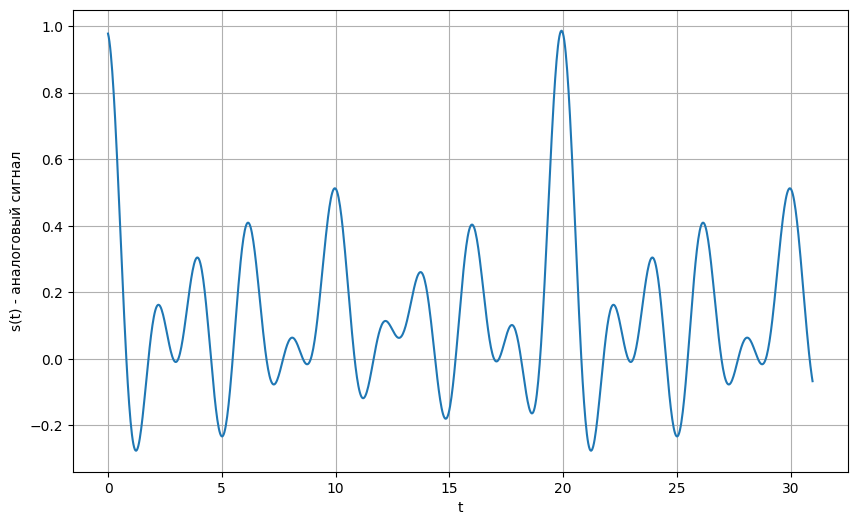

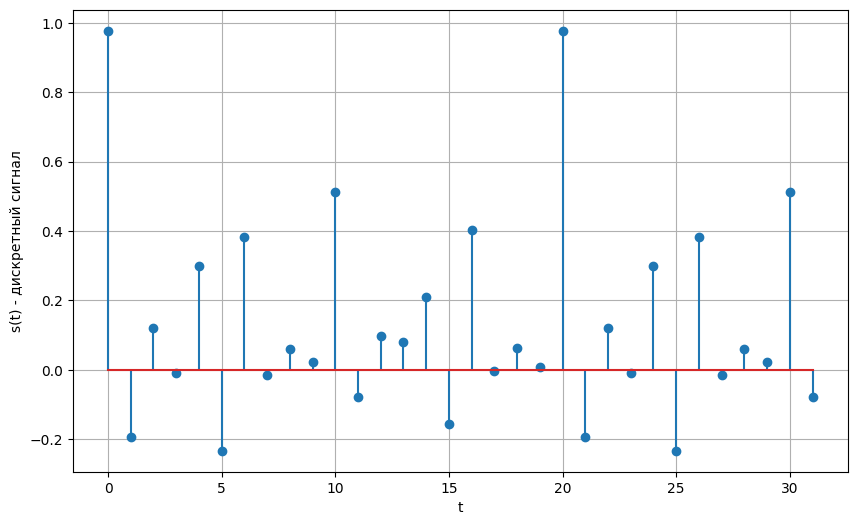

In [2]:
from math import cos
import matplotlib.pyplot as plt
t_analog = [i*N/1000 for i in range(1000)]
t_discrete = range(0, N + T, T)
def signal(t):
    result = 0
    for i in range(11):
        result += A[i] * cos(w[i] * t + fi[i])
    return result


plt.figure(figsize=(10, 6))
plt.plot(t_analog, [signal(t) for t in t_analog])
plt.ylabel("s(t) - аналоговый сигнал")
plt.xlabel("t")
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.stem(t_discrete, [signal(t) for t in t_discrete])
plt.ylabel("s(t) - дискретный сигнал")
plt.xlabel("t")
plt.grid()
plt.show()

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

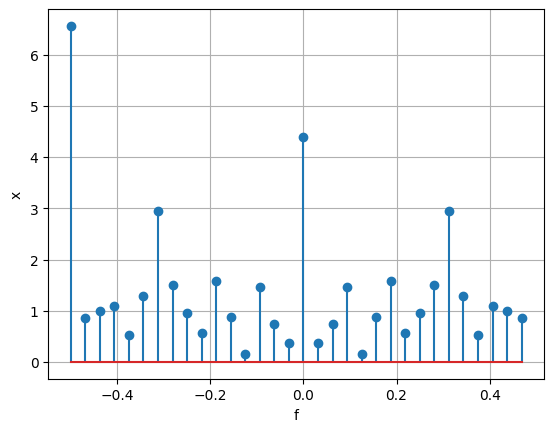

In [3]:
from scipy.fft import fftfreq
def furie(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

f = fftfreq(N + 1, T)
x = np.abs(furie([signal(t) for t in t_discrete]))
plt.stem(f, x)
plt.ylabel("x")
plt.xlabel("f")
plt.grid()
plt.show()

Спектр является периодической функцией и симметричен относительно точки 0.

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Передаточные функции для линейного сглаживания по 5-ти и 9-ти точкам:

$H_5(\omega)=\frac{1}{5}(1 + 2cos(\omega)+2cos(2\omega))$

$H_9(\omega)=\frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$

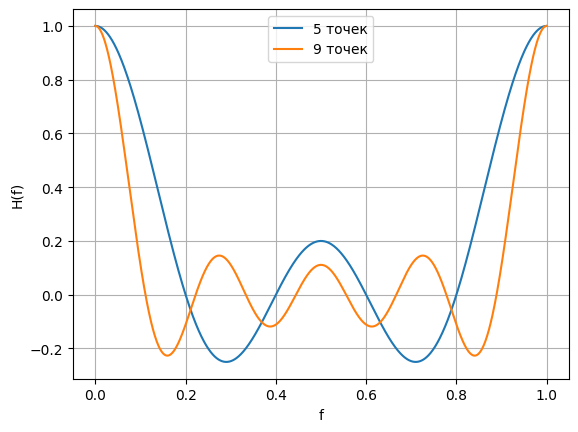

In [5]:
from math import cos

def h(f, value):
    match value:
      case 5:
        return (1 + 2*cos(2*pi * f) + 2*cos(4*pi*f)) / 5
      case 9:
        return (1 + 2*cos(2*pi * f) + 2*cos(4*pi*f) + 2 * cos(6*pi*f) + 2*cos(8*pi*f)) / 9

f = [i / 1000 for i in range(1000)]


plt.plot(f, [h(f_, 5) for f_ in f], label="5 точек")
plt.plot(f, [h(f_, 9) for f_ in f], label="9 точек")

plt.ylabel("H(f)")
plt.xlabel("f")

plt.legend()
plt.grid()
plt.show()

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

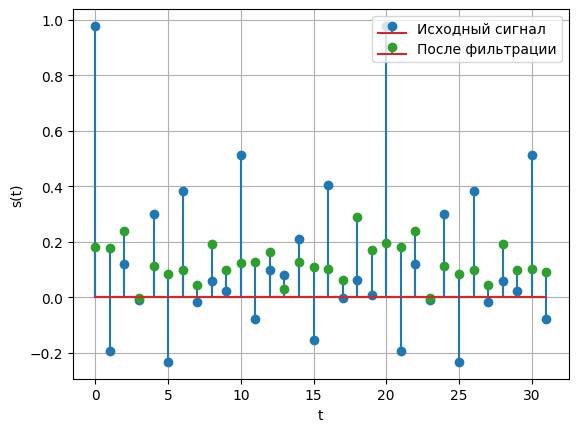

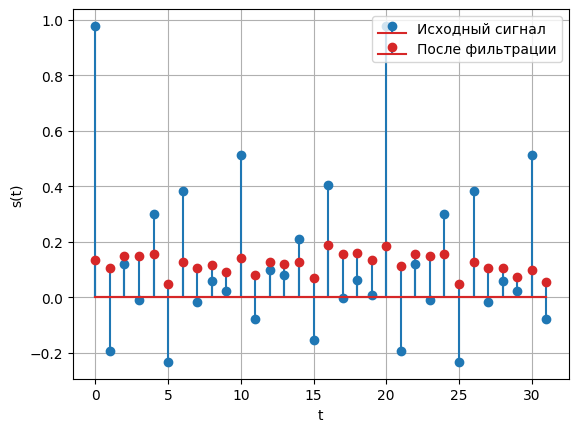

In [6]:
s = [signal(t) for t in t_discrete]
s5 = np.convolve(s, np.ones(5), 'same') / 5
s9 = np.convolve(s, np.ones(9), 'same') / 9

plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s5, label="После фильтрации", markerfmt="C2o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()


plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s9, label="После фильтрации", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

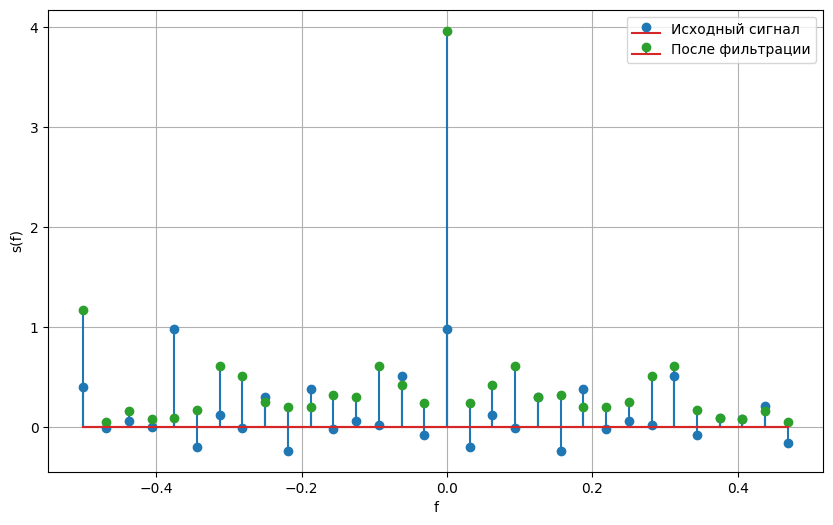

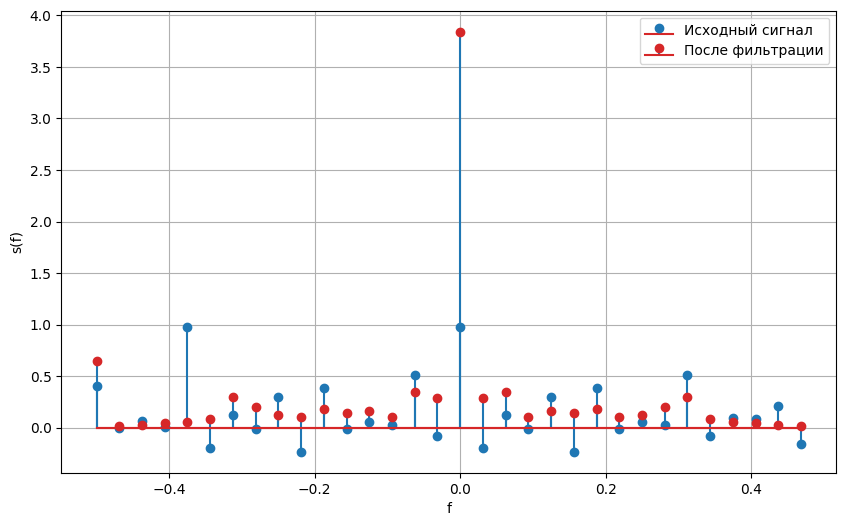

In [7]:
f = fftfreq(N + 1, T)
s5 = np.abs(furie(s5))

plt.figure(figsize=(10, 6))
plt.stem(f, s, label="Исходный сигнал")
plt.stem(f, s5, markerfmt="C2o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


s9 = np.abs(furie(s9))

plt.figure(figsize=(10, 6))
plt.stem(f, s, label="Исходный сигнал")
plt.stem(f, s9, markerfmt="C3o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Как и для $H(\omega)$: область убывания функции(полоса пропускания) тем меньше, чем больше использовалось точек.

#### 8. Повторить п. 4–7 для следующих фильтров:
##### a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
##### b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

**а. Фильтр сглаживания полиномом 2-ой степени по 5 и 9 узлам.**

Передаточные функции для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$H_5(\omega)=\frac{17+24cos(\omega)-6cos(2\omega)}{35}$$
$$H_9(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

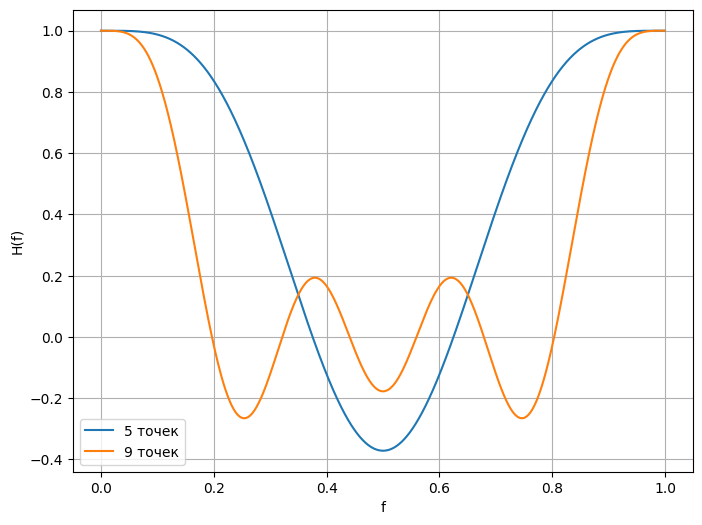

In [8]:
from math import cos

def h(f, value):
    match value:
      case 5:
        return (17 + 24 * cos(2 * pi * f) - 6 * cos(2 * 2 * pi * f)) / 35
      case 9:
        return (59 + 108 * cos(2 * pi * f) + 78 * cos(2 * 2 * pi * f) + 28 * cos(3 * 2 * pi * f) - 42 * cos(4 * 2 * pi * f)) / 231

f = [i / 1000 for i in range(1000)]


plt.figure(figsize=(8, 6))
plt.plot(f, [h(f_, 5) for f_ in f], label="5 точек")
plt.plot(f, [h(f_, 9) for f_ in f], label="9 точек")

plt.ylabel("H(f)")
plt.xlabel("f")

plt.legend()
plt.grid()
plt.show()

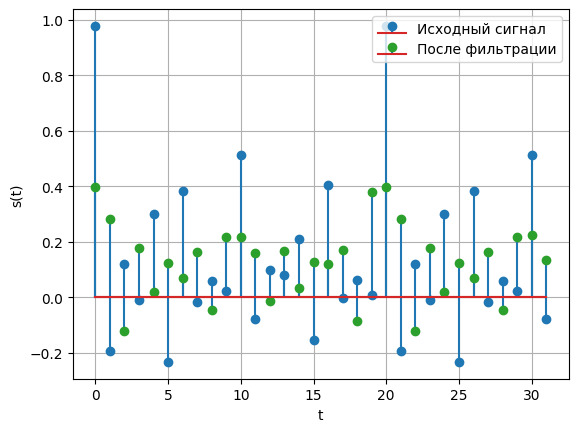

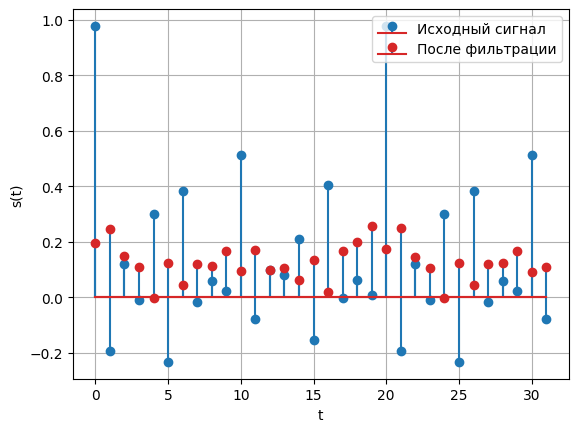

In [9]:
s = [signal(t) for t in t_discrete]
s5 = np.convolve(s, np.array([-3, 12, 17, 12, -3]), 'same') / 35
s9 = np.convolve(s, np.array([-21, 14, 39, 54, 59, 54, 39, 14, - 21]), 'same') / 231

plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s5, label="После фильтрации", markerfmt="C2o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()


plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s9, label="После фильтрации", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()



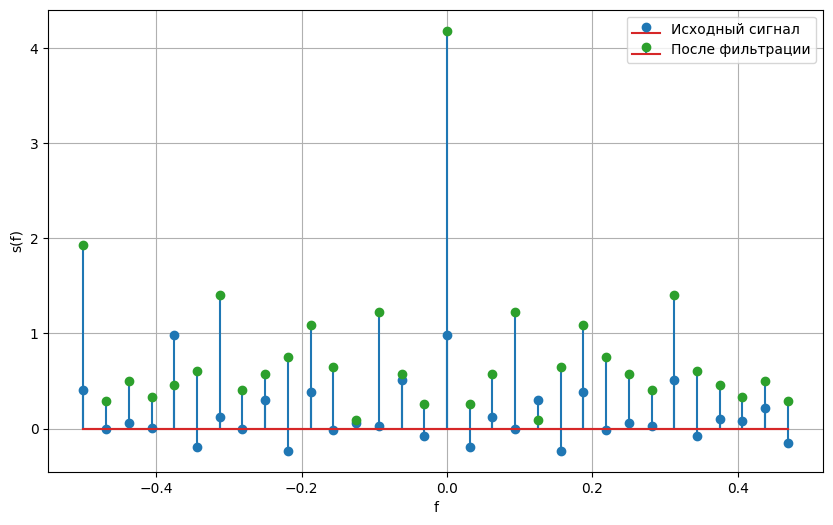

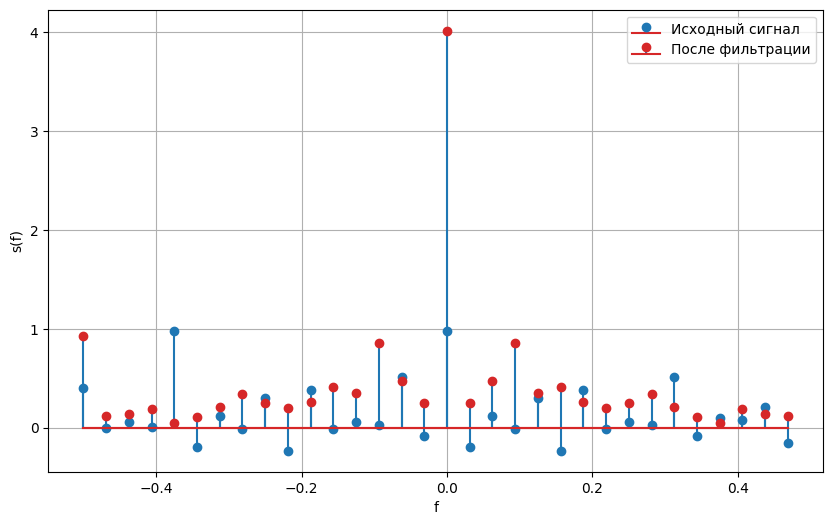

In [10]:
f = fftfreq(N + 1, T)
s5 = np.abs(furie(s5))

plt.figure(figsize=(10, 6))
plt.stem(f, s, label="Исходный сигнал")
plt.stem(f, s5, markerfmt="C2o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


s9 = np.abs(furie(s9))

plt.figure(figsize=(10, 6))
plt.stem(f, s, label="Исходный сигнал")
plt.stem(f, s9, markerfmt="C3o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

1) Как и для $H(\omega)$: область убывания функции(полоса пропускания) тем меньше, чем больше использовалось точек.

2) Полоса пропускания шире относительно линейного сглаживания.

**b. Фильтр сглаживания полиномом 4-ой степени по 7 и 11 узлам.**

Формулы для сглаживания полиномом четвёртой степени по 7-ти точкам и 11-ти точкам:
Передаточные функции для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$H_7(\omega)=\frac{131+150cos(\omega)-60cos(2\omega)+10cos(3\omega)}{231}$$
$$H_{11}(\omega)=\frac{143+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega)}{429}$$

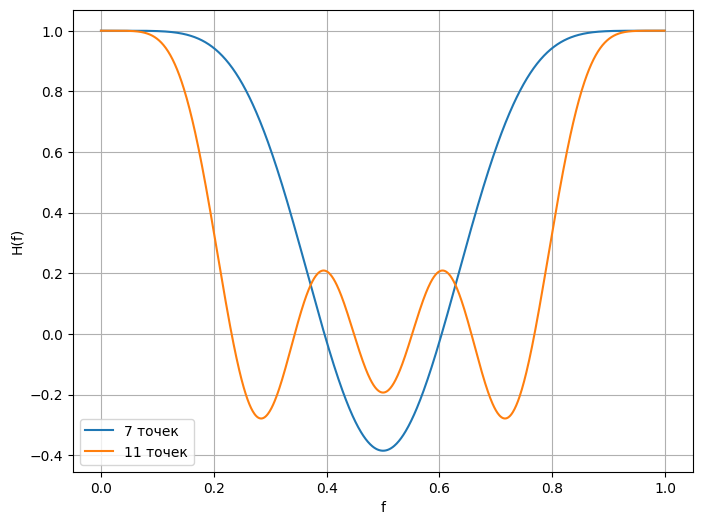

In [11]:
def h(f, value):
    match value:
      case 7:
        return (131 + 150 * cos(2 * pi * f) - 60 * cos(2 * 2 * pi * f) + 10 * cos(3 * 2 * pi * f)) / 231
      case 11:
        return (143 + 240 * cos(2 * pi * f) + 120 * cos(2 * 2 * pi * f) - 20 * cos(3 * 2 * pi * f) - 90 * cos(4 * 2 * pi * f) + 36 * cos(5 * 2 * pi * f)) / 429

f = [i / 1000 for i in range(1000)]


plt.figure(figsize=(8, 6))
plt.plot(f, [h(f_, 7) for f_ in f], label="7 точек")
plt.plot(f, [h(f_, 11) for f_ in f], label="11 точек")

plt.ylabel("H(f)")
plt.xlabel("f")

plt.legend()
plt.grid()
plt.show()

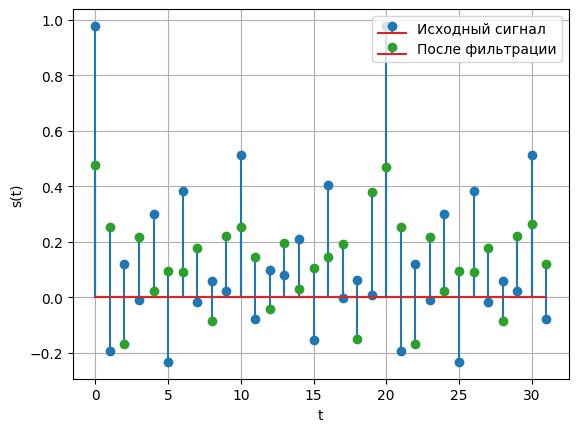

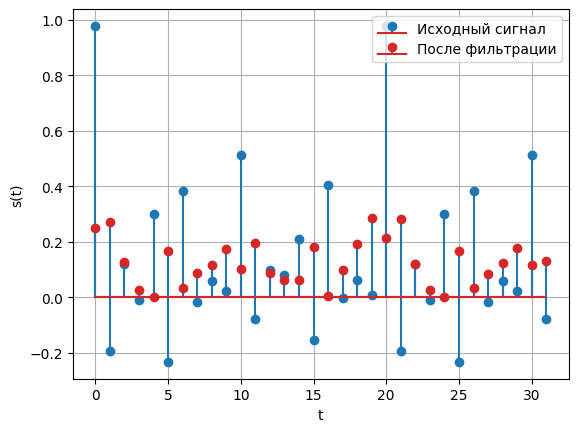

In [12]:
s = [signal(t) for t in t_discrete]
s7 = np.convolve(s, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
s11 = np.convolve(s, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s7, label="После фильтрации", markerfmt="C2o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()


plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s11, label="После фильтрации", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()



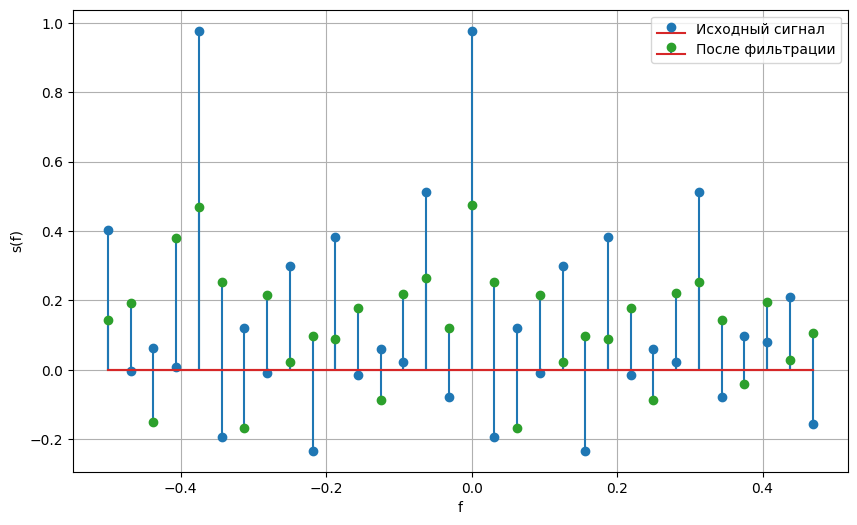

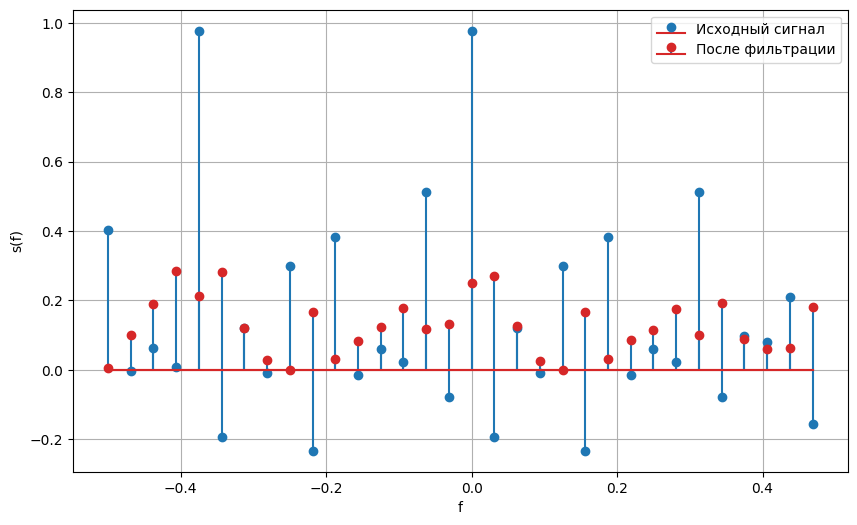

In [13]:
f = fftfreq(N + 1, T)
s5 = np.abs(furie(s5))

plt.figure(figsize=(10, 6))
plt.stem(f, s, label="Исходный сигнал")
plt.stem(f, s7, markerfmt="C2o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


s9 = np.abs(furie(s9))

plt.figure(figsize=(10, 6))
plt.stem(f, s, label="Исходный сигнал")
plt.stem(f, s11, markerfmt="C3o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

1) Как и для $H(\omega)$: область убывания функции(полоса пропускания) тем меньше, чем больше использовалось точек.

2) Полоса пропускания шире относительно полинома второй степени.

## Выводы

В ходе выполнения практической работы выполнена дискретизация аналогового сигнала с шагом T=1. С помощью ДПФ найдены дискретные отсчеты спектра дискретного сигнала. Далее проводилась фильтрация сигнала полиномами 1 и 2 степеней по 5 и 9 точкам, а также 4 степени по 7 и 11 точкам. Для каждого сглаживания выведены графики исходного и фильтрованного сигналов, а также спектра. В результате анализа выявлено, что как и для $H(\omega)$ область убывания функции(полоса пропускания) тем меньше, чем больше использовалось точек и полоса пропускания шире увеличивается при увеличении степени полинома.